# Baseball Case Study

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Importing All the necessary libraries.

In [2]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Here we read the CSV file in jupyter notebook.

In [3]:
df = pd.DataFrame(data=df)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Here we are loading the dataset into DataFrame.

# Data Inspection

In [4]:
df.shape

(30, 17)

There are 30 rows and 17 columns in our dataset.

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

The dataset is of integer type except for Column which has float. But since the dtype is float , it looks like there is some empty string value in that column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 17 columns and no columns have null values and 1 column is of float data type , where as rest all are of integer data type.

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here "W" (win)  is our target variable.

# Data Cleaning

In [8]:
#Checking for Null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing values in the dataset.

<AxesSubplot:>

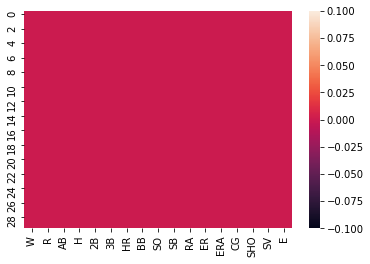

In [9]:
sn.heatmap(df.isnull())

This is the visualization of having absolute no null values in the dataset.

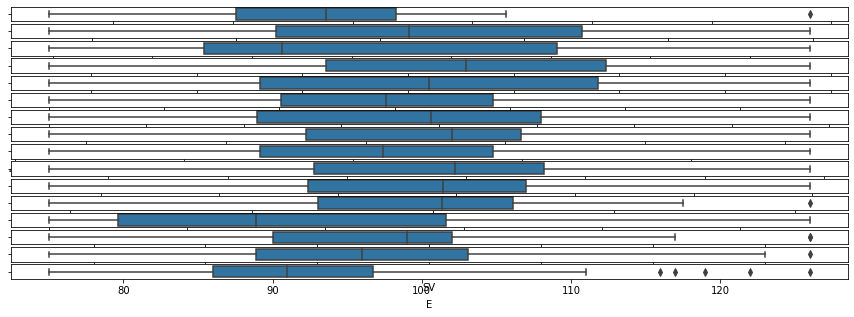

In [10]:
#Outlier Analysis
fig, axs = plt.subplots(16, figsize = (15,5))
plt1 = sn.boxplot(df['R'], ax = axs[0])
plt2 = sn.boxplot(df['AB'], ax = axs[1])
plt3 = sn.boxplot(df['H'], ax = axs[2])
plt4 = sn.boxplot(df['2B'], ax = axs[3])
plt5 = sn.boxplot(df['3B'], ax = axs[4])
plt6 = sn.boxplot(df['HR'], ax = axs[5])
plt7 = sn.boxplot(df['BB'], ax = axs[6])
plt8 = sn.boxplot(df['SO'], ax = axs[7])
plt9 = sn.boxplot(df['SB'], ax = axs[8])
plt10 = sn.boxplot(df['RA'], ax = axs[9])
plt11 = sn.boxplot(df['ER'], ax = axs[10])
plt12 = sn.boxplot(df['ERA'], ax = axs[11])
plt13 = sn.boxplot(df['CG'], ax = axs[12])
plt14 = sn.boxplot(df['SHO'], ax = axs[13])
plt15 = sn.boxplot(df['SV'], ax = axs[14])
plt16 = sn.boxplot(df['E'], ax = axs[15])
plt.tight_layout()

There are no any considerable outliers in any column, except for the last column , which is 'E' (Error)

In [11]:
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([5], dtype=int64), array([1], dtype=int64))


There are no considerable outliers in the dataset. Hence it's not necessary to remove them.

In [12]:
dfnew=df[(dfzscore<3).all(axis=1)]
df=dfnew
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


We have successfully removed the outliers.

In [13]:
df.shape

(29, 17)

There are now 29 rows and 17 columns.

In [14]:
((30-29)/30)*100 

3.3333333333333335

There is 3.33% data loss which is in acceptable range.

In [15]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

There is few skewness present in the dataset.

In [16]:
df['H']=np.sqrt(df['H'])
df['H'].skew()

0.7612737602321705

Treating the skewness of Column 'H'

In [17]:
df['CG']=np.sqrt(df['CG'])
df['CG'].skew()

-0.2606778075812151

Treating the skewness of column 'CG'

In [18]:
df['E']=np.log(df['E'])
df['E'].skew()

0.5833075389348484

After treating the skewness , no considerable skewness is present as we are taking the threshold as +/- 0.75 

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='W'>

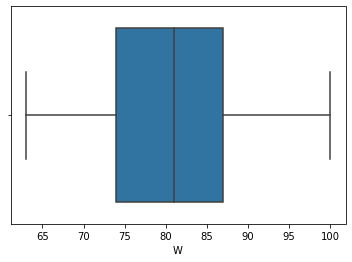

In [19]:
sn.boxplot(df['W'])

W or Wins is our target variable. It is very tightly distributed and it has no outliers. 

<AxesSubplot:xlabel='W', ylabel='Density'>

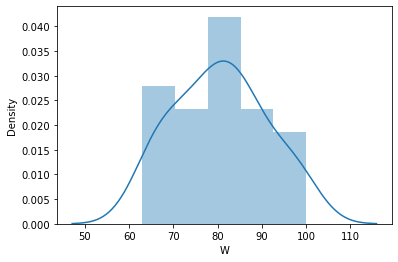

In [20]:
sn.distplot(df['W'])

The W or wins or our target column is almost normally distributed . 

<AxesSubplot:xlabel='R', ylabel='Density'>

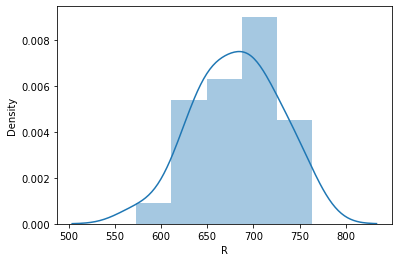

In [21]:
sn.distplot(df['R'])

The 'R' or Runs is almost normally distributed. 

<AxesSubplot:xlabel='AB', ylabel='Density'>

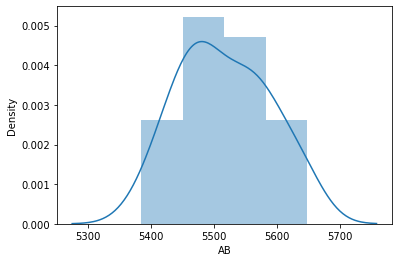

In [22]:
sn.distplot(df['AB'])

This column is also almost normally distributed.

<AxesSubplot:xlabel='H', ylabel='Density'>

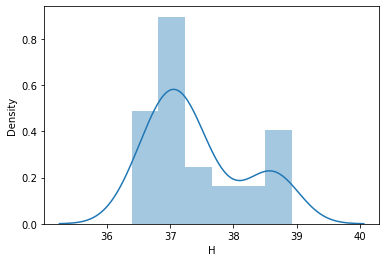

In [23]:
sn.distplot(df['H'])

It's not normally distributed. 

<AxesSubplot:xlabel='2B', ylabel='Density'>

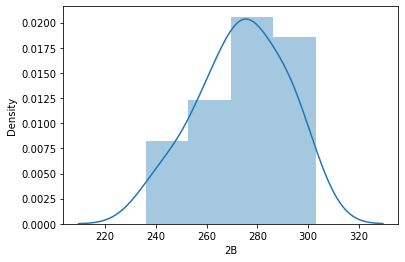

In [24]:
sn.distplot(df['2B'])

This is almlost normally distributed.

<AxesSubplot:xlabel='3B', ylabel='Density'>

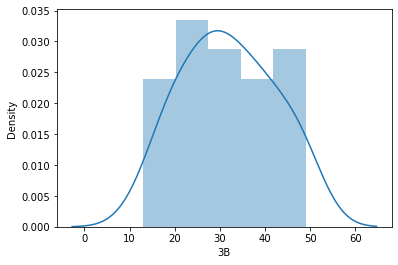

In [25]:
sn.distplot(df['3B'])

This is almlost normally distributed.

<AxesSubplot:xlabel='HR', ylabel='Density'>

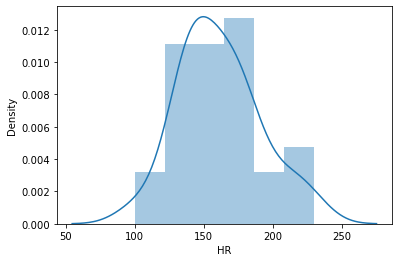

In [26]:
sn.distplot(df['HR'])

This is also almost normally distributed.

<AxesSubplot:xlabel='BB', ylabel='Density'>

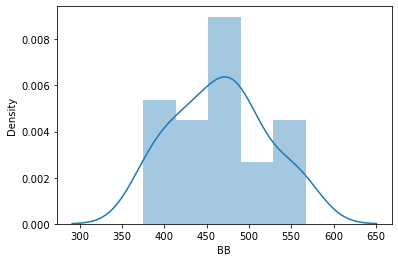

In [27]:
sn.distplot(df['BB'])

This is almost normaized data.

<AxesSubplot:xlabel='SO', ylabel='Density'>

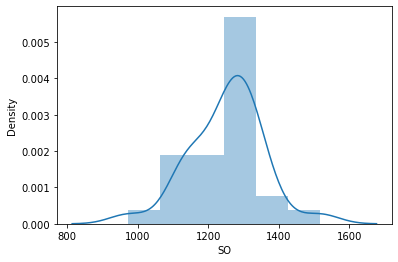

In [28]:
sn.distplot(df['SO'])

This data is not normalized.

<AxesSubplot:xlabel='SB', ylabel='Density'>

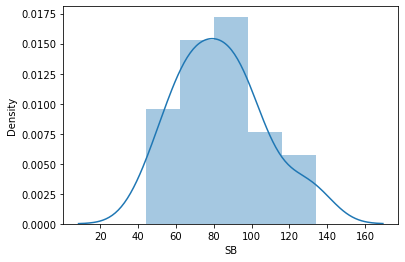

In [29]:
sn.distplot(df['SB'])

This is almost normally distributed curve.

<AxesSubplot:xlabel='RA', ylabel='Density'>

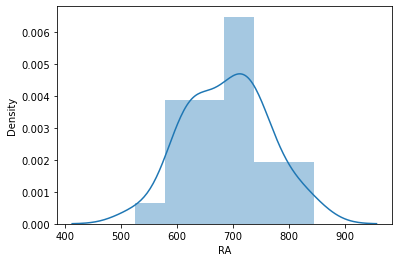

In [30]:
sn.distplot(df['RA'])

This data is not normalized.

<AxesSubplot:xlabel='ER', ylabel='Density'>

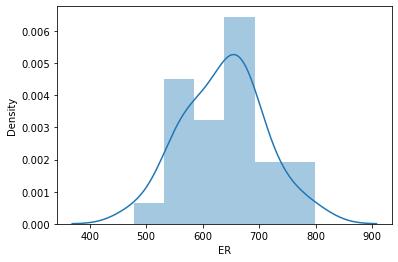

In [31]:
sn.distplot(df['ER'])

This is almlost normally distributed.

<AxesSubplot:xlabel='ERA', ylabel='Density'>

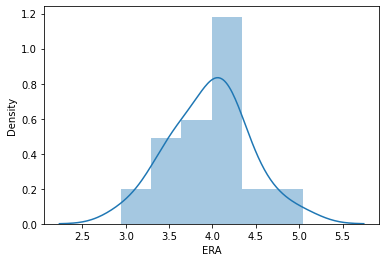

In [32]:
sn.distplot(df['ERA'])

Column 'ERA' has almost normally distributed data.

<AxesSubplot:xlabel='CG', ylabel='Density'>

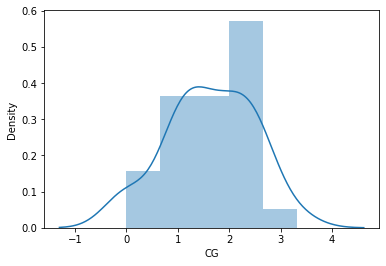

In [33]:
sn.distplot(df['CG'])

This data is not normalized.

<AxesSubplot:xlabel='SHO', ylabel='Density'>

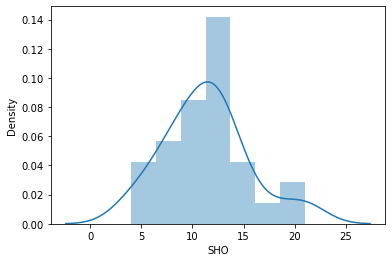

In [34]:
sn.distplot(df['SHO'])

The column 'SHO' has almost normally distributed data.

<AxesSubplot:xlabel='SV', ylabel='Density'>

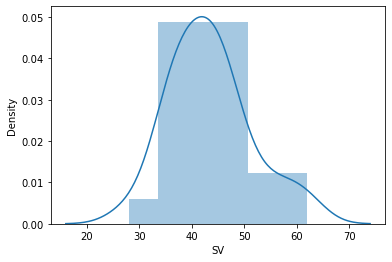

In [35]:
sn.distplot(df['SV'])

The column "SV" is almost normally distributed.

<AxesSubplot:xlabel='E', ylabel='Density'>

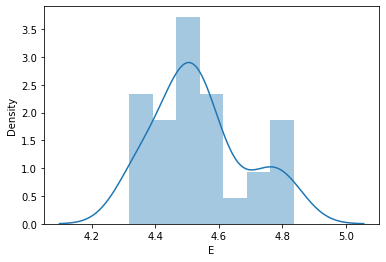

In [36]:
sn.distplot(df['E'])

The column 'E' or error does not have normalized data.

<AxesSubplot:xlabel='W', ylabel='R'>

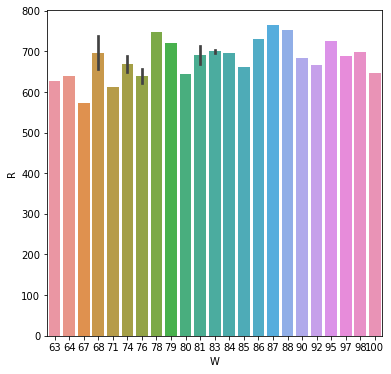

In [37]:
plot=plt.figure(figsize=(6,6))
sn.barplot(x='W',y='R',data=df)

The Runs are continuously varying with the Wins. There's no proper pattern. 

<AxesSubplot:xlabel='W', ylabel='AB'>

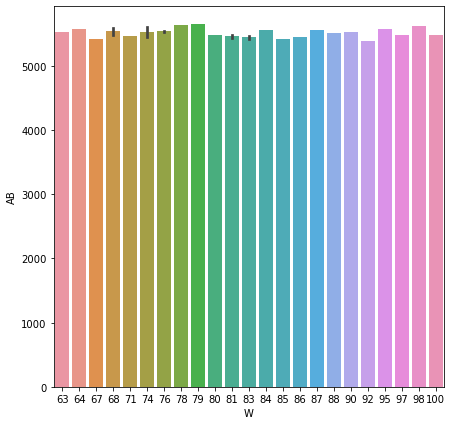

In [38]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='AB',data=df)

At bat, the plate appearance is almost same for all the win percentage.

<AxesSubplot:xlabel='W', ylabel='H'>

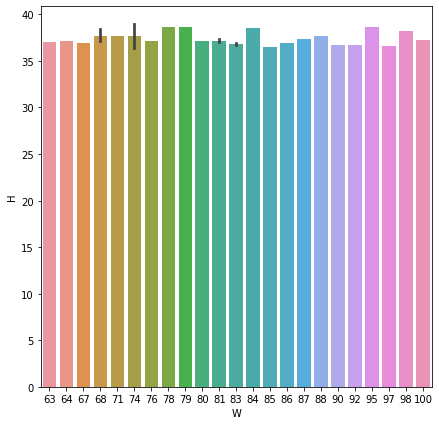

In [39]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='H',data=df)

The hits / Number of times the ball reaches the base is almost same for all wins .

<AxesSubplot:xlabel='2B', ylabel='W'>

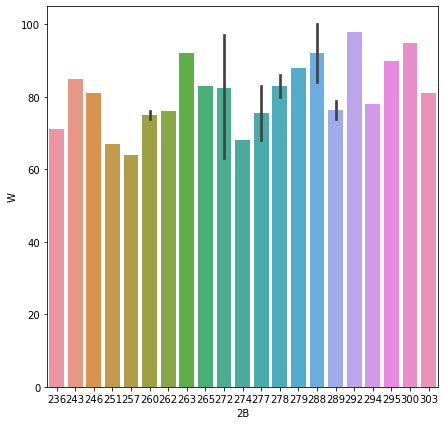

In [40]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='2B',y='W',data=df)

As the average of batted reaching the second base increases , the wins is also increased.

<AxesSubplot:xlabel='3B', ylabel='W'>

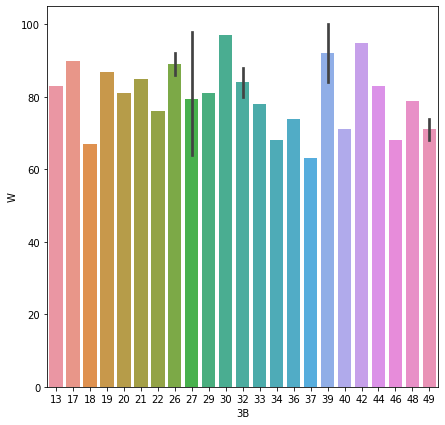

In [41]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='3B',y='W',data=df)

For all the batted reaching the third base has a wins in range 60-95 .

<AxesSubplot:xlabel='W', ylabel='HR'>

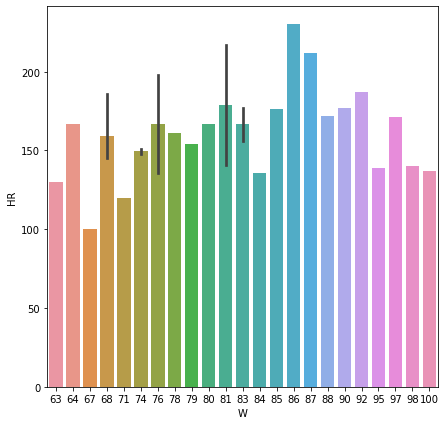

In [42]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='HR',data=df)

Looks like home runs are difficult to achieve . Out of all the wins ,the batter reaches all the four bases only 20% of the times.

<AxesSubplot:xlabel='W', ylabel='BB'>

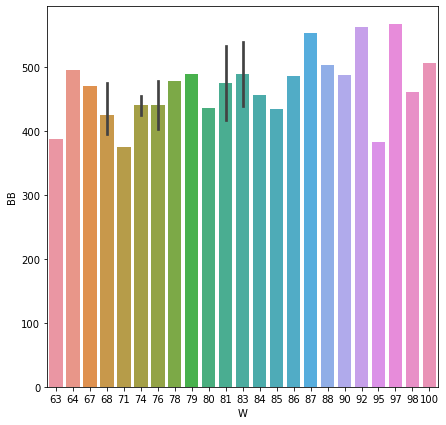

In [43]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='BB',data=df)

Only 15% of times the player is pitching all four bases, and the batter is allowed to take the first base

<AxesSubplot:xlabel='W', ylabel='SO'>

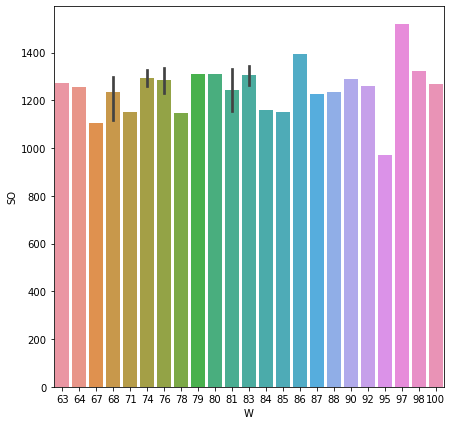

In [44]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='SO',data=df)

Very few number of batters are striking three.

<AxesSubplot:xlabel='W', ylabel='SB'>

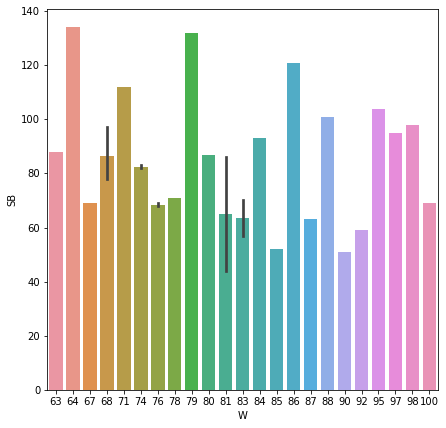

In [45]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='SB',data=df)

A same number of wins percentage has different number of stolen bases.

<AxesSubplot:xlabel='W', ylabel='RA'>

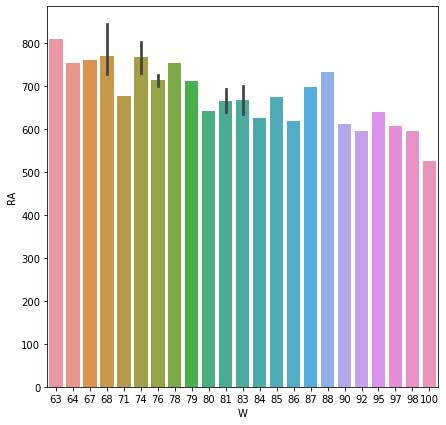

In [46]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='RA',data=df)

The win ratio increases wih decrease in the Run Average. They both are almost inversly proportional to each other.

<AxesSubplot:xlabel='W', ylabel='ER'>

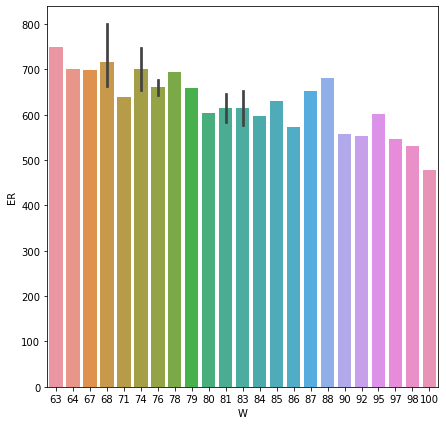

In [47]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='ER',data=df)

As the Earned Run points increases , the win percentage decreases.

<AxesSubplot:xlabel='W', ylabel='ERA'>

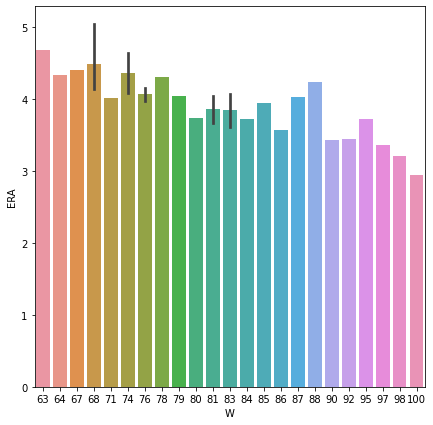

In [48]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='ERA',data=df)

As the Earned Run Average decrases thewin percentage increases.

[Text(0, 0, '1.4142135623730951'),
 Text(1, 0, '3.3166247903554'),
 Text(2, 0, '2.6457513110645907'),
 Text(3, 0, '1.7320508075688772'),
 Text(4, 0, '0.0'),
 Text(5, 0, '1.0'),
 Text(6, 0, '2.23606797749979'),
 Text(7, 0, '2.449489742783178'),
 Text(8, 0, '2.0')]

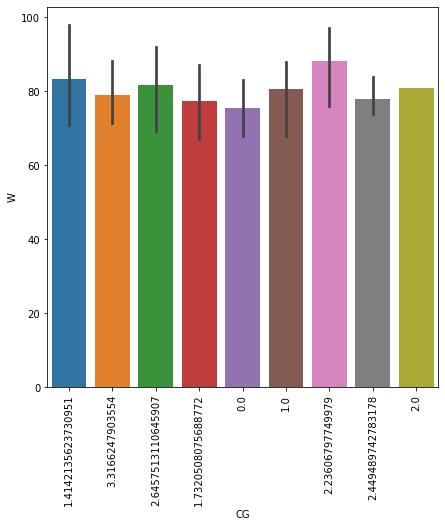

In [49]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='CG',y='W',data=df).set_xticklabels(labels=df['CG'].unique(),rotation=90)

For all the different number of complete games, the win percentage is almost same .

<AxesSubplot:xlabel='SHO', ylabel='W'>

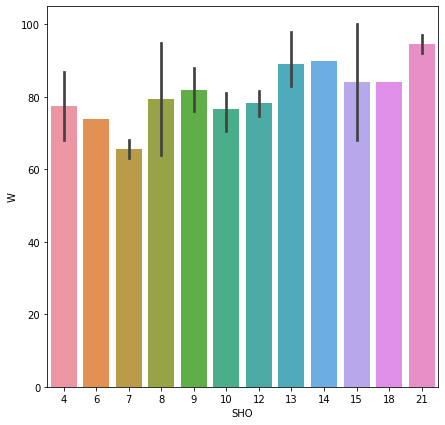

In [50]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='SHO',y='W',data=df)

With increase in shutout, the win percentage also increases. 

<AxesSubplot:xlabel='W', ylabel='SV'>

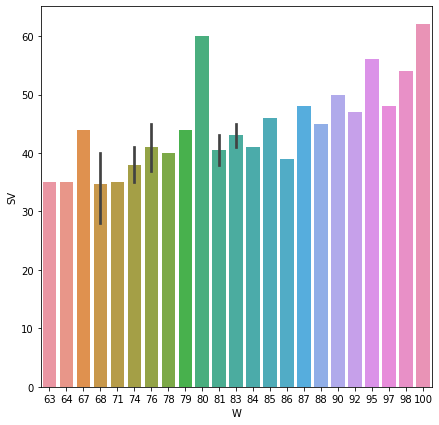

In [51]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='SV',data=df)

With increase in SV , the win percentage also increases. Though there are few exceptions as well. 

<AxesSubplot:xlabel='W', ylabel='E'>

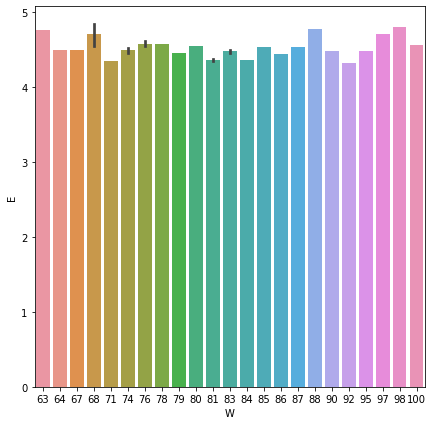

In [52]:
plot=plt.figure(figsize=(7,7))
sn.barplot(x='W',y='E',data=df)

Every win has errors between 9-11.

# Bivariate Analysis

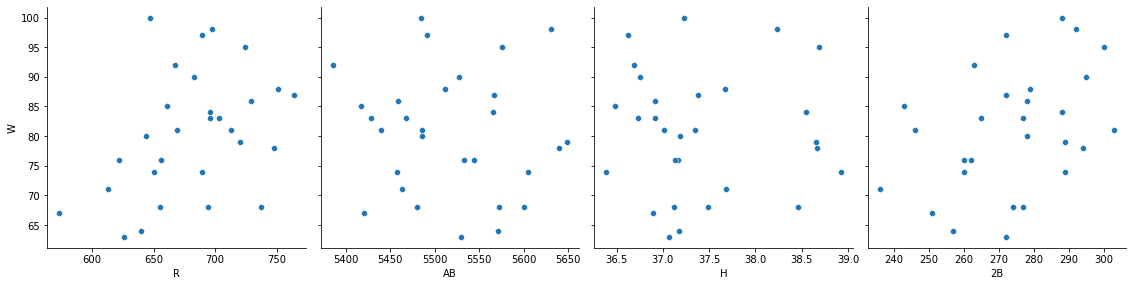

In [53]:
sn.pairplot(df, x_vars=['R', 'AB', 'H', '2B'], y_vars='W', height=4, aspect=1, kind='scatter')

The Runs shows a direct relation with wins , followed by '2B'. Whereas 'AB' and 'H' does not seem to contribute much with 'W'/wins. 

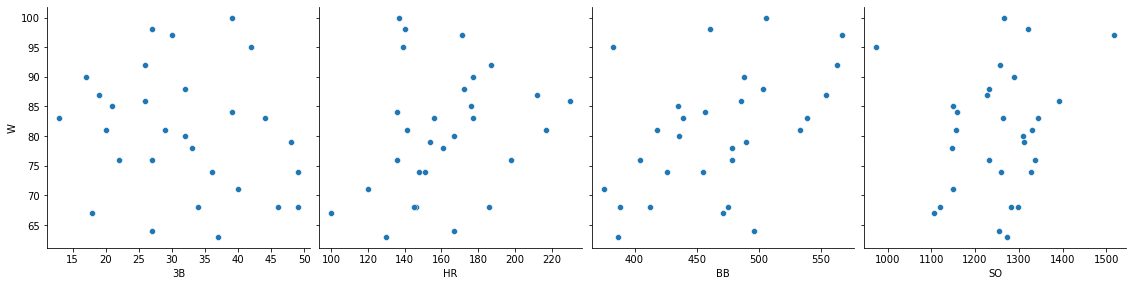

In [54]:
sn.pairplot(df, x_vars=['3B', 'HR', 'BB', 'SO'], y_vars='W', height=4, aspect=1, kind='scatter')

Against the wins / 'W', the range of 'SO' is least followed by the range of 'HR', 'BB'  and Finally '3B'

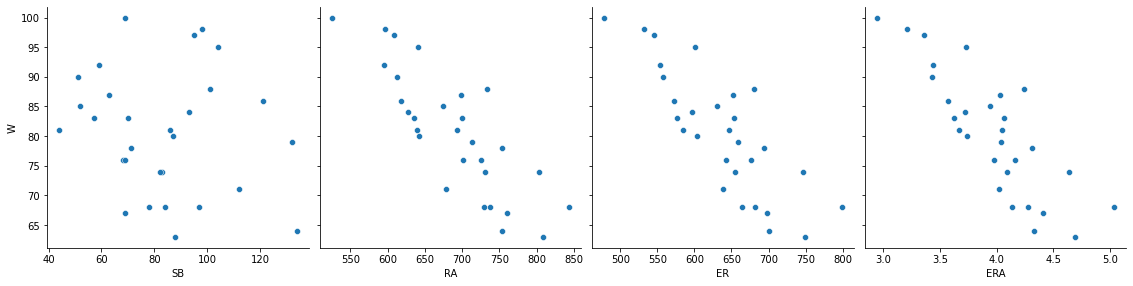

In [55]:
sn.pairplot(df, x_vars=['SB', 'RA', 'ER', 'ERA'], y_vars='W', height=4, aspect=1, kind='scatter')

'RA', 'ER', 'ERA' shows  an inverse relation with the Wins/'W' but 'SB' does not show any specific relation with the 'W'.

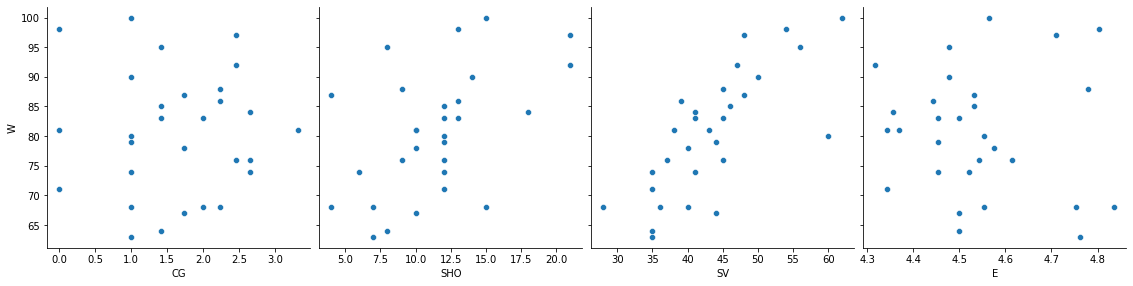

In [56]:
sn.pairplot(df, x_vars=['CG', 'SHO', 'SV', 'E'], y_vars='W', height=4, aspect=1, kind='scatter')

'CG' shows no specific relation with the "W", whereas 'SHO' and 'SV' shows almost direct relationship with thw "W" and 'E' shows a linear relation with 'W'.

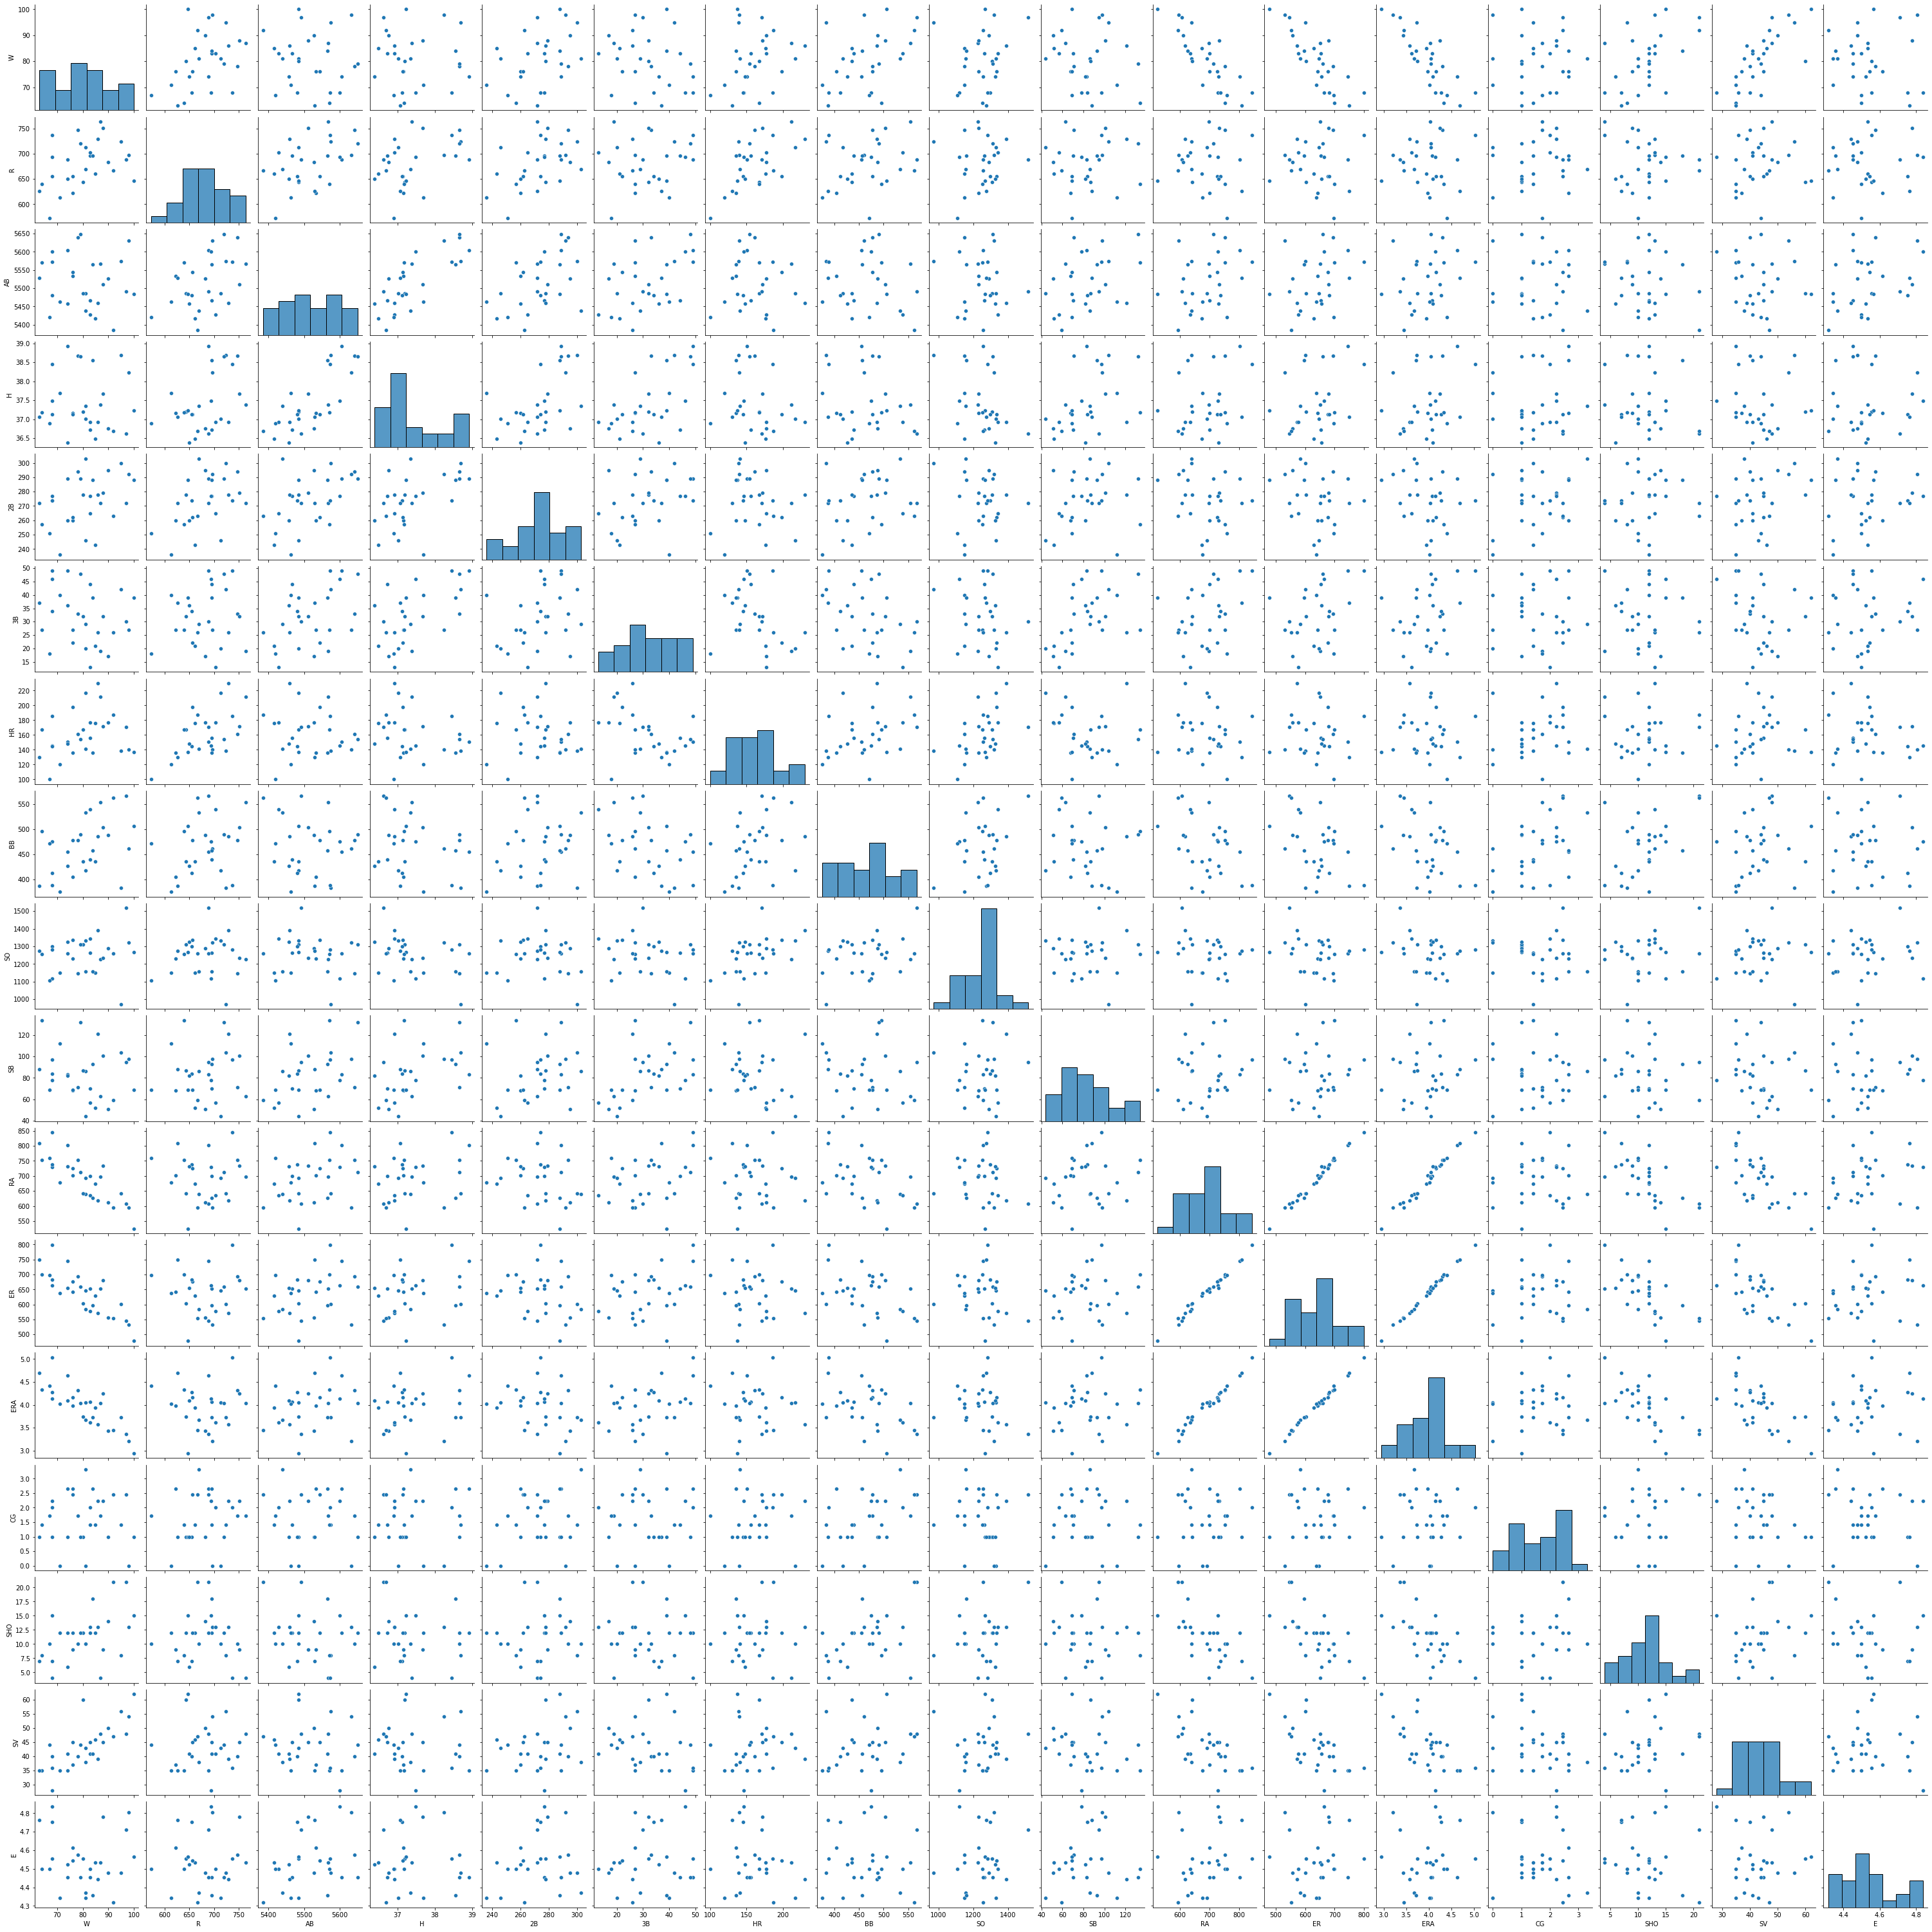

In [57]:
sn.pairplot(df)

Pairplot gives the graph of each column with every another column and itself as well.

# Multivariate Analysis

<AxesSubplot:>

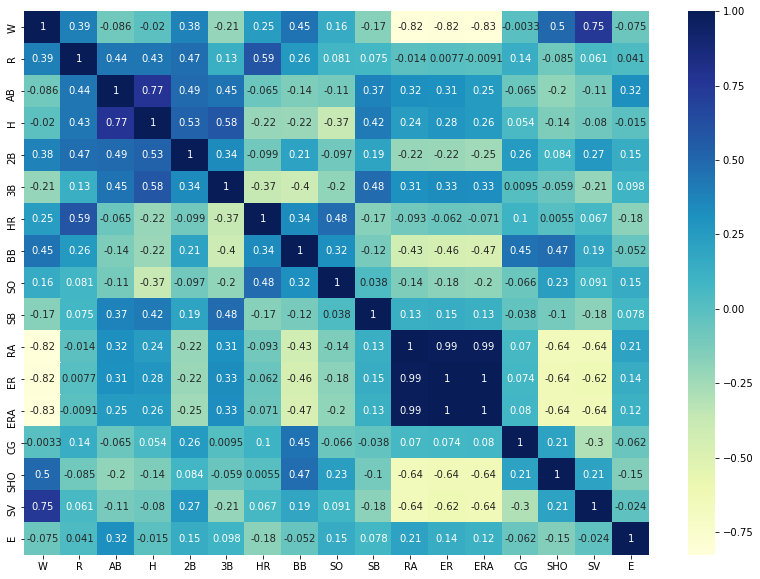

In [58]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(), cmap="YlGnBu", annot = True)

We can see that 'RA', "ER" and 'ERA' have multicollinearity . We will have to remove it. Also, 'CG' and 'AB' has least covarince with the target variable.

# Variance Inflation Factor

In [59]:
from scipy import stats
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def calc_vif(x):
    vf = pd.DataFrame()
    vf['variables']=x.columns
    vf['VIF FACTOR']= [vif(x.values,i) for i in range(x.shape[1])]
    return vf
x1= df.iloc[:,1:]
calc_vif(x1)

,variables,VIF FACTOR
0,R,1448.008553
1,AB,28407.434591
2,H,23539.942259
3,2B,898.853923
4,3B,35.895077
5,HR,257.044412
6,BB,268.855153
7,SO,413.779900
8,SB,29.030070
9,RA,18012.140670


From the vif calculation , it is clear that , we should remove columns 'ER', 'ERA'. 

In [60]:
x=x1.drop(['ER','ERA'],axis=1)
calc_vif(x)

,variables,VIF FACTOR
0,R,1381.214960
1,AB,23882.446941
2,H,17668.579717
3,2B,832.463887
4,3B,34.815166
5,HR,199.258199
6,BB,242.556990
7,SO,340.453723
8,SB,24.283834
9,RA,468.738124


Now after dropping 2 columns , we have a data with multicollinearity in very acceptable range. And we can't drop more columns because they contain important information and we hav e already lost 12.5% of data by dropping 2 columns.

# Model Building

In [61]:
y = df.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

'y' contains our target variable.

In [62]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

scale = StandardScaler()
x=scale.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  1.65148704e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -2.86700649e-01, -7.87002186e-01,
         1.53275292e+00, -3.46086288e-01],
       [ 2.98863300e-01,  0.00000000e+00, -1.02695666e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01, -2.86700649e-01,  2.36736538e-01,
         3.12020186e-01, -5.38685139e-01],
       [-3.12105130e-01,  0.00000000e+00, -6.59715196e-03,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01,  2.12228636e+00, -2.52844176e-01,
        -6.64136739e-01, -1.32702800e+00],
       [-1.30829774e+00,  0.00000000e+00, -3.25459497e-01,
        -8.37664770e-01, -4.32227907e-01, -8.60039342e-01,
        -1.16272085e+00, -2.30682707e-01, -6.

We have standarized the input/feature variables.

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print("Predicted Values",pred_test)
print(r2_score(ytest,pred_test))

Predicted Values [71.28355123 91.68640735 77.47659797 70.33454186 81.21382591 83.67328868
 69.66708714 91.28659351 80.96747789]
0.8895981184382895


The r2_score of Linear Regression is 88.95%

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
dtr=DecisionTreeRegressor(criterion='mse',random_state=58)
dtr.fit(xtrain,ytrain)
print('DTC Score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('DTC r2_score:',r2_score(ytest,dtrpredict))

print("Mean squared error of DTC:",mean_squared_error(ytest,dtrpredict))
print("Root Mean Square error of DTC:",np.sqrt(mean_squared_error(ytest,dtrpredict)))

DTC Score: 1.0
DTC r2_score: 0.05239294710327447
Mean squared error of DTC: 92.88888888888889
Root Mean Square error of DTC: 9.637888196533973


The r2_score of Decision Tree Regressor is 5.2% 

In [65]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
print('SCORE:',knr.score(xtrain,ytrain))
knrpredict=knr.predict(xtest)
print("r2_score:",r2_score(ytest,knrpredict))
print("Mean Square Error:",mean_squared_error(ytest,knrpredict))
print("Root Mean Square:",np.sqrt(mean_squared_error(ytest,knrpredict)))

SCORE: 0.723287863543836
r2_score: 0.4493904282115868
Mean Square Error: 53.973333333333336
Root Mean Square: 7.346654567443153


The r2 score of KNeighborsRegressor is 44.93%

In [66]:
svr = SVR()
svr.fit(xtrain,ytrain)
print('Score:',svr.score(xtrain,ytrain))
svrpredict=svr.predict(xtest)
print('r2_Score:',r2_score(ytest,svrpredict))
print("Mean Squared Error Of DTC:",mean_squared_error(ytest,svrpredict))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,svrpredict)))

Score: 0.23732688029754112
r2_Score: 0.06556511485161487
Mean Squared Error Of DTC: 91.59769121084169
Root Mean Squared Error: 9.570668273994334


The r2 Score of SVR is 6.55%

In [67]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('SGD SCORE:',sgd.score(xtrain,ytrain))
sgdpredict=sgd.predict(xtest)
print('SGD r2_score:',r2_score(ytest,sgdpredict))
print('Mean squared Error:',mean_squared_error(ytest,sgdpredict))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(ytest,sgdpredict)))

SGD SCORE: 0.9127670308846036
SGD r2_score: 0.7313617949427702
Mean squared Error: 26.333177137708702
Root Mean Squared Error: 5.131586220430161


The r2 Score of SGD Regressor  is 73.13%

# Cross Value Score

In [68]:
from sklearn.model_selection import cross_val_score as cvs
print(cvs(lr,x,y,cv=4).mean())
print(cvs(dtr,x,y,cv=4).mean())
print(cvs(knr,x,y,cv=4).mean())
print(cvs(svr,x,y,cv=4).mean())
print(cvs(sgd,x,y,cv=4).mean())

0.38800195355486655
-0.41604771271953256
0.4321662556953595
-0.08143906059990377
-4.8598793579012485


Since all the r2 score are very less other than Linear regression and SGD Regressor , hence we will compare it's cv_score. Out of these two, The least difference between r2-Score and cv_score is of Linear Regression . Hence we will select the best fit parameters for Linear Regression Model.

# Hyper Parameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
parameter = {'copy_X':[True,False],
            'normalize':[True,False],
            'fit_intercept':[True,False],
            'n_jobs':[-1,0,1,10,100,1000,10000]}
gvc = GridSearchCV(lr,parameter,cv=5)
gvc.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 0, 1, 10, 100, 1000, 10000],
                         'normalize': [True, False]})

Printing all the parameters to tune

In [70]:
gvc.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

Getting all the best parameter to apply in our model

In [71]:
baseball_model = LinearRegression(normalize=False,copy_X=True,fit_intercept=True,n_jobs=-1)
baseball_model.fit(xtrain,ytrain)
pred=baseball_model.predict(xtest)
accuracy=r2_score(ytest,pred)
print(accuracy*100)

88.95981184382894


We have applied the best Parameters and got 88.95% accuracy.

# Model Saving

In [72]:
import pickle
filename = 'Baseball.pkl'
pickle.dump(baseball_model,open(filename,'wb'))

Saving the best model

# Conclusion

In [73]:
a= np.array(ytest)
predicted = np.array(lr.predict(xtest))
Baseball=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Baseball

,Original,Predicted
0,74,71.283551
1,97,91.686407
2,76,77.476598
3,67,70.334542
4,78,81.213826
5,88,83.673289
6,71,69.667087
7,95,91.286594
8,79,80.967478


We can see that our model is working fine , The predicted values are approximately same as the original value.